## Import Libraries

In [1]:
# Keras Datasets: 
#    https://jovianlin.io/datasets-within-keras/
from keras.datasets import cifar10

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils 
from keras.utils.vis_utils import plot_model

# Set random seed (for reproducibility):
#     https://machinelearningmastery.com/reproducible-results-neural-networks-keras/
import numpy as np
import pandas as pd

np.random.seed(42)

import time

import matplotlib.pyplot as plt

from random import randint

## Load Data

#### Number of clases

In [2]:
num_classes = 10

#### Load training and test datasets

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

labels=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#### Print shape of the data

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


this is a/an truck


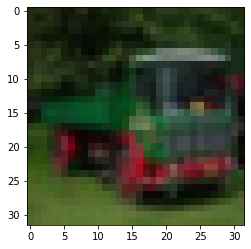

In [6]:
n_row= randint(0,X_train.shape[0]+1)

image=X_train[n_row]
plt.imshow(image)

print("this is a/an", labels[y_train[n_row][0]])

In [7]:
type(y_train[n_row])

numpy.ndarray

#### Format Y data: convert class vectors to binary class matrices

In [8]:
y_train_old = y_train.copy()
y_test_old = y_test.copy()
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

## Plot Training Results

#### Import plot libraries

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

# Optional: Seaborn is a Python data visualization library based on matplotlib 
#    https://seaborn.pydata.org/
import seaborn as sns
sns.set()

#### Plot method

In [10]:
def plot_history(history):
    
    # Plot training & validation accuracy values
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

## Convolutional Model Definition

In [ ]:
# Compile method doc: https://keras.io/models/sequential/
# Optimizers doc: https://keras.io/optimizers/

In [11]:
# Input image dimensions
_, img_rows, img_cols, img_channels = X_train.shape

In [12]:
def create_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(img_rows, img_cols, img_channels), data_format='channels_last'))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(16, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(16, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(8, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(8, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    
    return model

## Create a model and print model-summary

In [13]:
model=create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                        

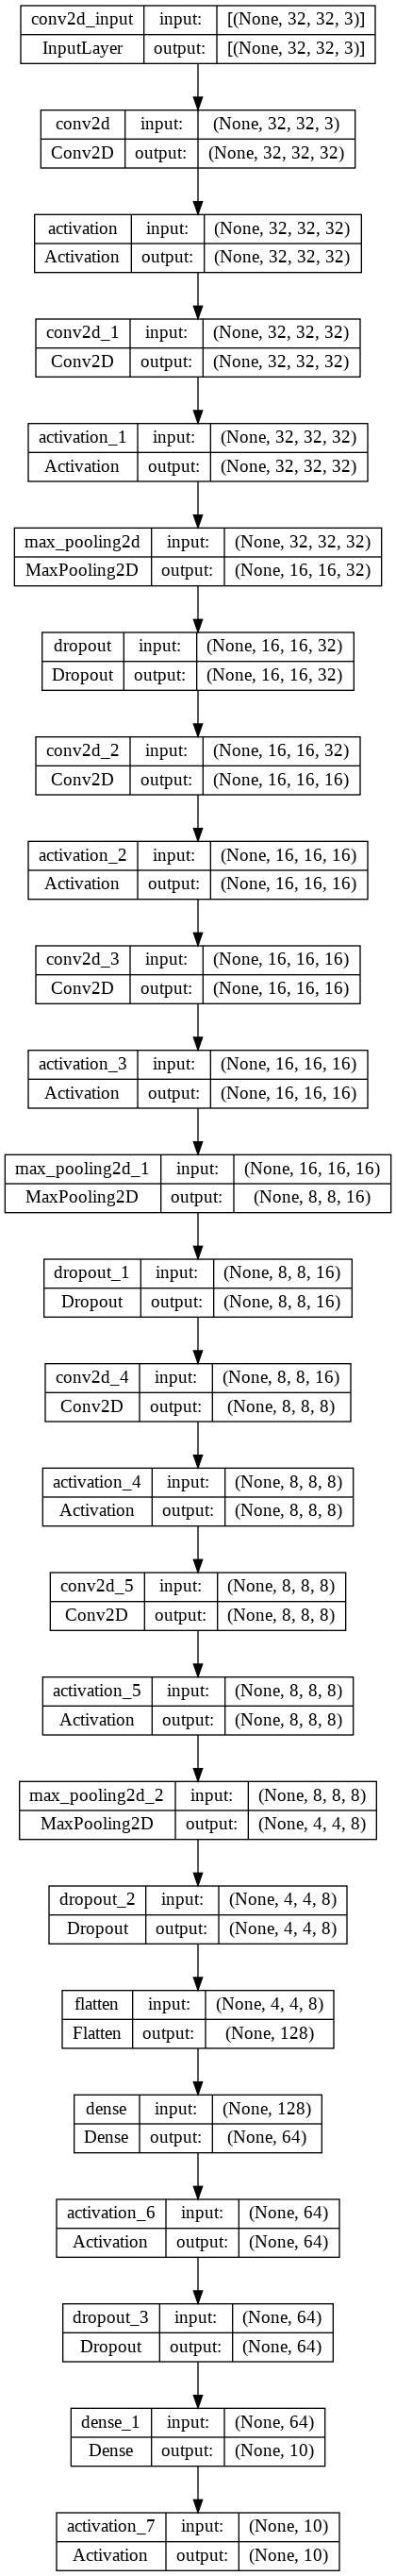

In [14]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Example of Training:

In [15]:
batch_size = 128
nb_epoch = 20

import tensorflow as tf

#tf.Session(config=tf.ConfigProto(intra_op_parallelism_threads=4))


In [16]:
model = create_model()
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    shuffle=True)

tf =  time.time()

Epoch 1/20
391/391 [==============================] - 8s 13ms/step - loss: 2.8754 - accuracy: 0.1190 - val_loss: 2.2268 - val_accuracy: 0.1906
Epoch 2/20
391/391 [==============================] - 5s 12ms/step - loss: 2.0840 - accuracy: 0.2131 - val_loss: 1.9186 - val_accuracy: 0.2865
Epoch 3/20
391/391 [==============================] - 4s 9ms/step - loss: 1.8614 - accuracy: 0.2938 - val_loss: 1.6528 - val_accuracy: 0.3859
Epoch 4/20
391/391 [==============================] - 4s 9ms/step - loss: 1.7246 - accuracy: 0.3526 - val_loss: 1.6318 - val_accuracy: 0.4007
Epoch 5/20
391/391 [==============================] - 4s 9ms/step - loss: 1.6446 - accuracy: 0.3802 - val_loss: 1.5169 - val_accuracy: 0.4429
Epoch 6/20
391/391 [==============================] - 4s 9ms/step - loss: 1.5853 - accuracy: 0.4068 - val_loss: 1.4653 - val_accuracy: 0.4525
Epoch 7/20
391/391 [==============================] - 4s 9ms/step - loss: 1.5275 - accuracy: 0.4327 - val_loss: 1.4167 - val_accuracy: 0.4701
Epoc

#### Evaluate trained model with test data

In [17]:
score = model.evaluate(X_test, y_test)
time_delta = tf-t0
exec("batch_size_" + str(batch_size) + "= batch_size")
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")


print("batch_size: ", batch_size, ", score: ", score, ", time_delta: ", time_delta)

313/313 [==============================] - 1s 3ms/step - loss: 1.1239 - accuracy: 0.5933
batch_size:  128 , score:  [1.1239309310913086, 0.5932999849319458] , time_delta:  80.26528906822205


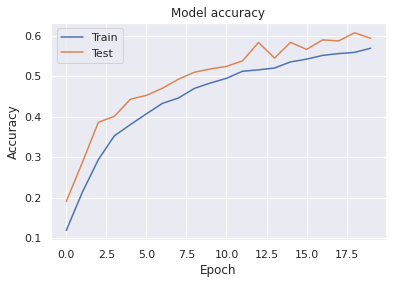

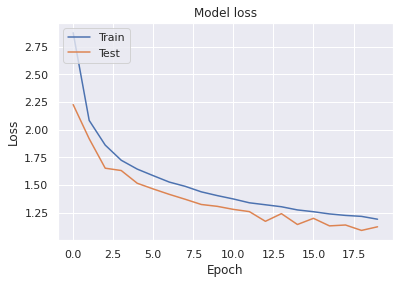

In [18]:
plot_history(history)

## Batch 8

In [19]:
batch_size = 8
nb_epoch = 20



model_2 = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history_2 = model_2.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Epoch 1/20
6250/6250 - 30s - loss: 2.1193 - accuracy: 0.2120 - val_loss: 2.0150 - val_accuracy: 0.2563 - 30s/epoch - 5ms/step
Epoch 2/20
6250/6250 - 29s - loss: 1.7592 - accuracy: 0.3395 - val_loss: 1.6488 - val_accuracy: 0.3848 - 29s/epoch - 5ms/step
Epoch 3/20
6250/6250 - 26s - loss: 1.6722 - accuracy: 0.3755 - val_loss: 1.5512 - val_accuracy: 0.4250 - 26s/epoch - 4ms/step
Epoch 4/20
6250/6250 - 27s - loss: 1.6313 - accuracy: 0.3935 - val_loss: 1.4829 - val_accuracy: 0.4424 - 27s/epoch - 4ms/step
Epoch 5/20
6250/6250 - 29s - loss: 1.5999 - accuracy: 0.4063 - val_loss: 1.5176 - val_accuracy: 0.4517 - 29s/epoch - 5ms/step
Epoch 6/20
6250/6250 - 26s - loss: 1.5872 - accuracy: 0.4150 - val_loss: 1.5088 - val_accuracy: 0.4427 - 26s/epoch - 4ms/step
Epoch 7/20
6250/6250 - 29s - loss: 1.5835 - accuracy: 0.4173 - val_loss: 1.4451 - val_accuracy: 0.4653 - 29s/epoch - 5ms/step
Epoch 8/20
6250/6250 - 38s - loss: 1.5657 - accuracy: 0.4253 - val_loss: 1.5340 - val_accuracy: 0.4486 - 38s/epoch - 6

#### Evaluate trained model with test data

In [20]:
score = model_2.evaluate(X_test, y_test)
time_delta = tf-t0
exec("batch_size_" + str(batch_size) + "= batch_size")
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")


print("batch_size: ", batch_size, ", score: ", score, ", time_delta: ", time_delta)

313/313 [==============================] - 1s 3ms/step - loss: 1.4720 - accuracy: 0.4681
batch_size:  8 , score:  [1.4720046520233154, 0.46810001134872437] , time_delta:  565.3346214294434


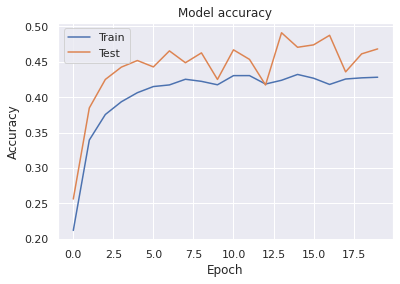

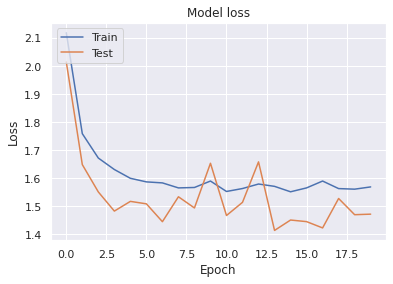

In [21]:
plot_history(history_2)

this is a/an frog
313/313 [==============================] - 1s 2ms/step
[['0.20%']
 ['0.10%']
 ['11.13%']
 ['6.82%']
 ['19.35%']
 ['5.67%']
 ['54.43%']
 ['2.10%']
 ['0.02%']
 ['0.18%']]
**************
[['0.00%']
 ['0.00%']
 ['0.00%']
 ['0.00%']
 ['0.00%']
 ['0.00%']
 ['100.00%']
 ['0.00%']
 ['0.00%']
 ['0.00%']]


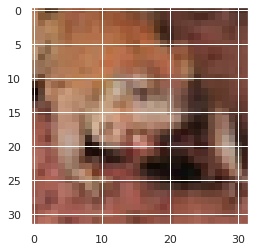

In [25]:
pos = 5 

image=X_test[pos]
plt.imshow(image)

print("this is a/an", labels[y_test_old[pos][0]])

x= model_2.predict(X_test)[pos]
y = y_test [pos]


print(pd.DataFrame(x/float(np.sum(x))).applymap(lambda x: '{:.2%}'.format(x)).values )
print("**************")
print(pd.DataFrame(y/float(np.sum(y))).applymap(lambda y: '{:.2%}'.format(y)).values)